In [1]:
import os

import pandas as pd
from tqdm import tqdm
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from zoology.analysis.utils import fetch_wandb_runs

In [4]:
df = fetch_wandb_runs(
    launch_id=["default-2023-10-25-22-20-38"], project_name="zoology"
)

<Axes: xlabel='model.d_model', ylabel='valid/accuracy'>

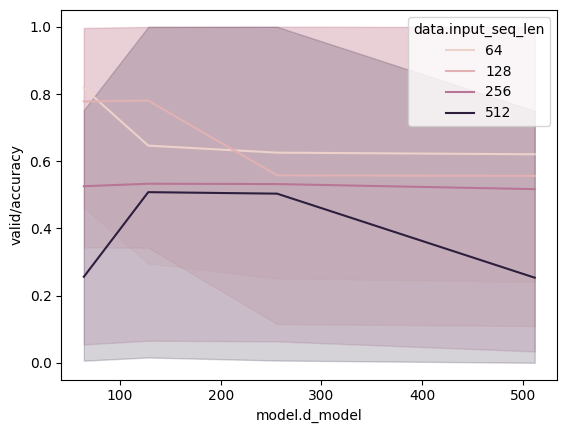

In [6]:
plot_df
sns.lineplot(
    data=df,
    x="model.d_model",
    y="valid/accuracy",
    hue="data.input_seq_len",
)